# Census

## Carregando as bibliotecas

In [2]:
library(repr)
options(repr.plot.width= 8, repr.plot.height= 8)

## Carregando o DataFrame 

In [3]:
census <- read.csv("../datasets/census.csv")
head(census)

X,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Tipo de Dados

- Unnamed: 0 - Numérico Discreto (Sem utilidade)
- age (idade)- Numérico Discreto
- wordclass (tipo de emprego) - Categórico Nominal
- final.weight (peso final) - Numérico contínuo
- education (educação)- Categórica Ordinal
- education.num (anos de estudos) - Numérico Discreto
- marital.status (estado civil) - CCategórica Nominal
- occupation (trabalho) - Categórica Nominal
- relationship (relação)  - Categórica Nominal
- race (raça) - Categórica Nominal
- sex (sexo) - Categórica Nominal
- capital.gain (ganho de capital) - Numérica Contínua
- capital.loss (perda de capital) - Numérica Contínua
- hours.week (horas da semana) - Numética Discreta
- native.country (pais de origem) - Categórica Nominal
- income (renda anual) - Classe Alvo - Categórica Ordinal

In [4]:
str(census)

'data.frame':	30162 obs. of  16 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 7 levels " Federal-gov",..: 6 5 3 3 3 3 3 5 3 3 ...
 $ final.weight  : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loos  : int  

## Sumário Estatístico

In [5]:
summary(census)

       X              age                    workclass      final.weight    
 Min.   :    1   Min.   :17.00    Federal-gov     :  943   Min.   :  13769  
 1st Qu.: 8179   1st Qu.:28.00    Local-gov       : 2067   1st Qu.: 117627  
 Median :16286   Median :37.00    Private         :22286   Median : 178425  
 Mean   :16288   Mean   :38.44    Self-emp-inc    : 1074   Mean   : 189794  
 3rd Qu.:24403   3rd Qu.:47.00    Self-emp-not-inc: 2499   3rd Qu.: 237629  
 Max.   :32561   Max.   :90.00    State-gov       : 1279   Max.   :1484705  
                                  Without-pay     :   14                    
         education    education.num                  marital.status 
  HS-grad     :9840   Min.   : 1.00    Divorced             : 4214  
  Some-college:6678   1st Qu.: 9.00    Married-AF-spouse    :   21  
  Bachelors   :5044   Median :10.00    Married-civ-spouse   :14065  
  Masters     :1627   Mean   :10.12    Married-spouse-absent:  370  
  Assoc-voc   :1307   3rd Qu.:13.00    

## Estudo das Variáveis

### age

- Sem valores inválidos

In [6]:
summary(census$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.44   47.00   90.00 

In [7]:
table(census[is.na(census$age),]$age)

< table of extent 0 >

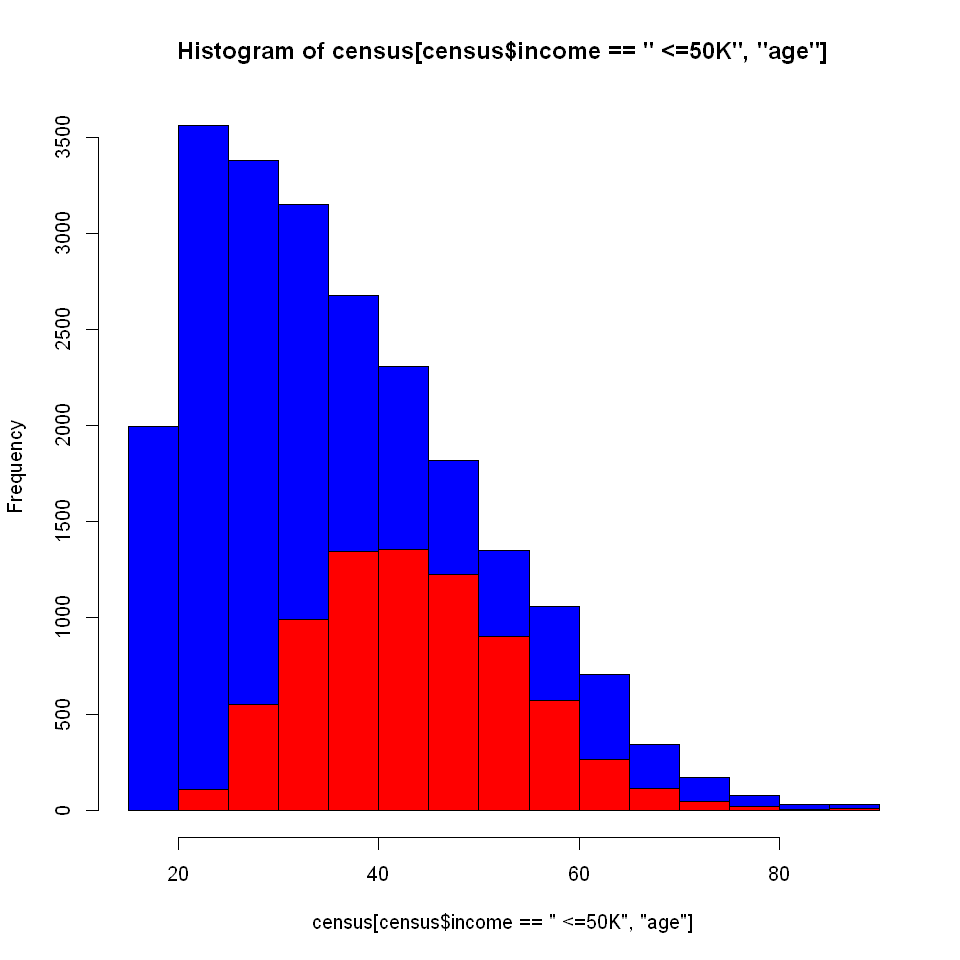

In [8]:
# Idade por cada renda anual
hist(
    census[census$income == ' <=50K', 'age'],
    col = 'Blue'
)
hist(
    census[census$income != ' <=50K', 'age'],
    add = T,
    col = 'Red'
)

### workclass

- Sem valores Inválidos

In [9]:
table(census$workclass, useNA = 'ifany')


      Federal-gov         Local-gov           Private      Self-emp-inc 
              943              2067             22286              1074 
 Self-emp-not-inc         State-gov       Without-pay 
             2499              1279                14 

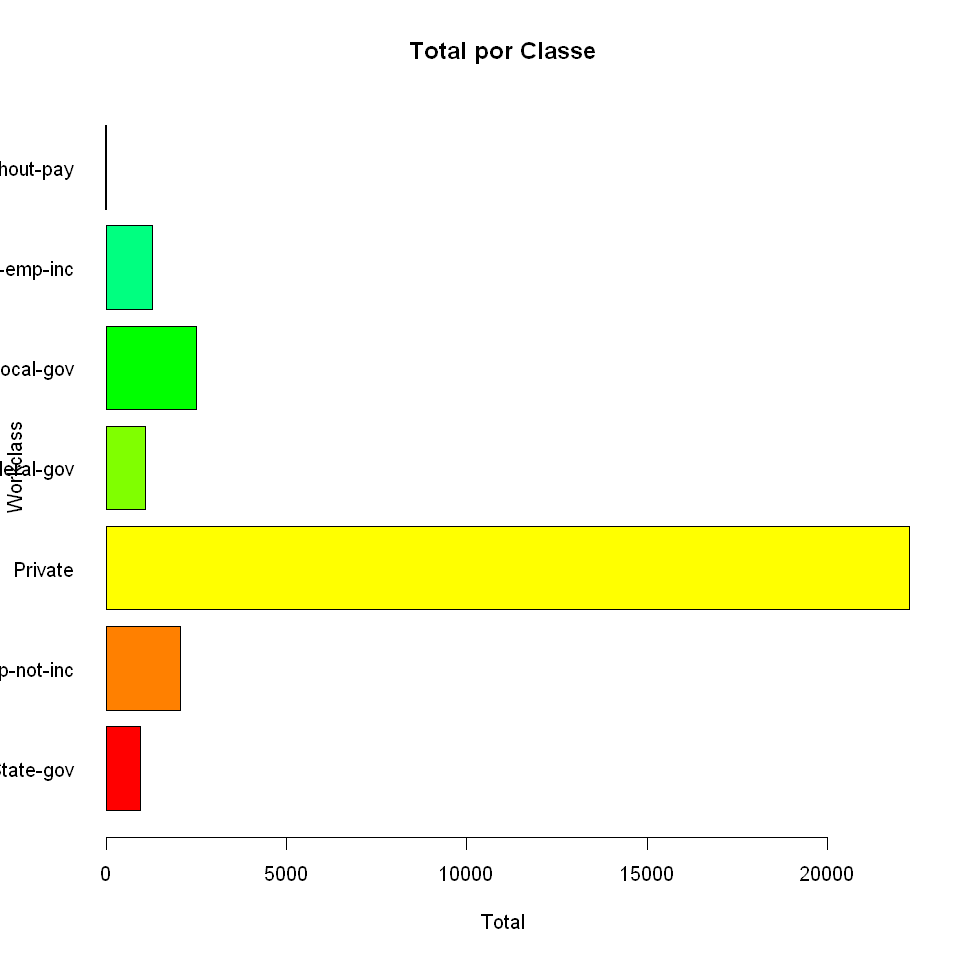

In [10]:
agg <- aggregate( . ~ census$workclass, data = census, length)

barplot(
    agg$workclass,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'Workclass',
    main = 'Total por Classe',
    names = unique(census$workclass),
    horiz=TRUE
)

###  final.weight

- Sem valores inválidos

In [11]:
summary(census$final.weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13769  117627  178425  189794  237629 1484705 

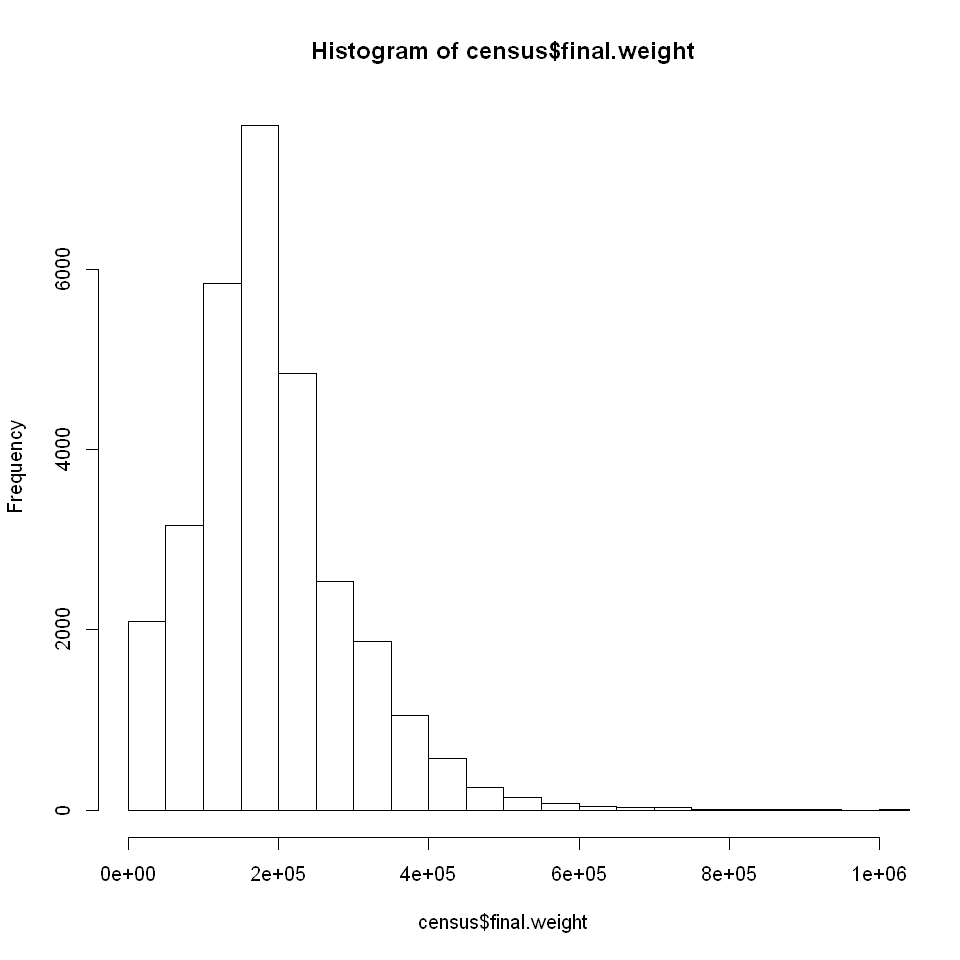

In [12]:
hist(census$final.weight, breaks = 50, xlim = c(0, 1000000))

### education 

- Sem valores inválidos encontrados

In [13]:
table(census$education, useNA = 'ifany')


         10th          11th          12th       1st-4th       5th-6th 
          820          1048           377           151           288 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          557           455          1008          1307          5044 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          375          9840          1627            45           542 
 Some-college 
         6678 

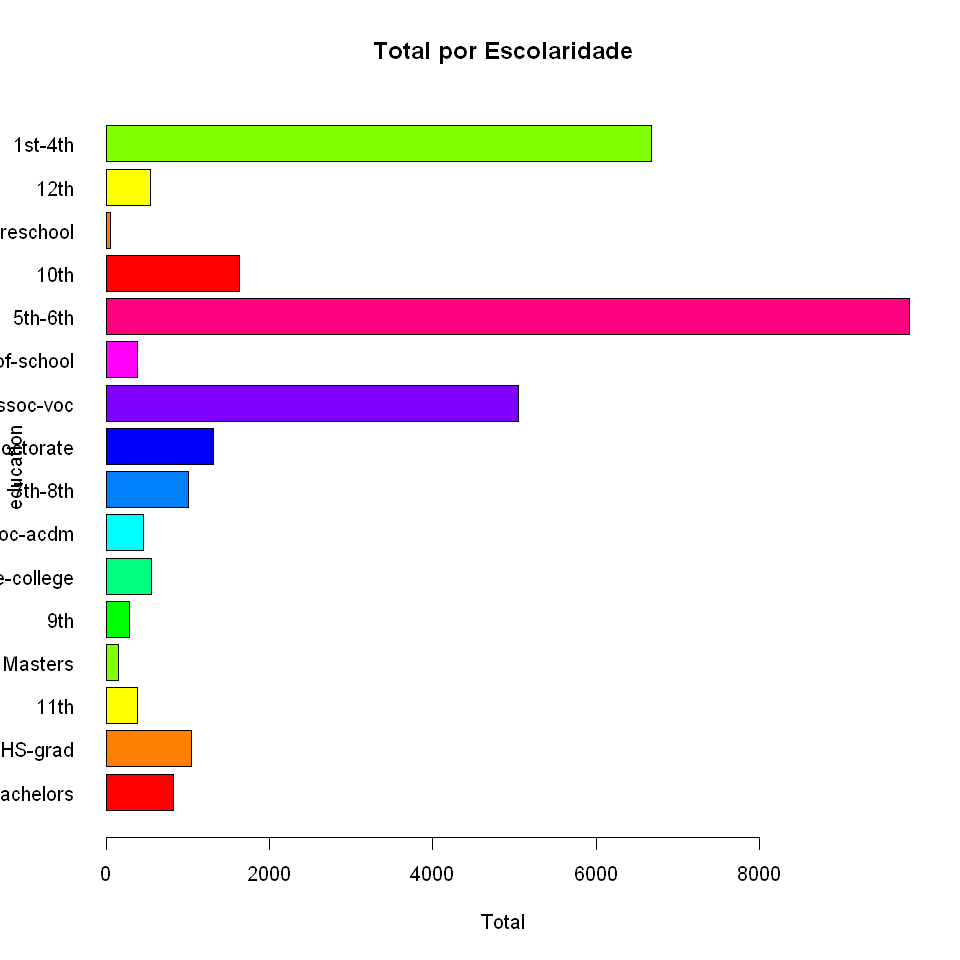

In [14]:
agg <- aggregate( . ~ census$education, data = census, length)

barplot(
    agg$education,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'education',
    main = 'Total por Escolaridade',
    names = unique(census$education),
    horiz=TRUE
)

### education.num 

- Sem valores inválidos

In [15]:
sum(is.na(census$education.num))
sum(is.null(census$education.num))
table(census$education.num)

[1] 0

[1] 0


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  45  151  288  557  455  820 1048  377 9840 6678 1307 1008 5044 1627  542  375 

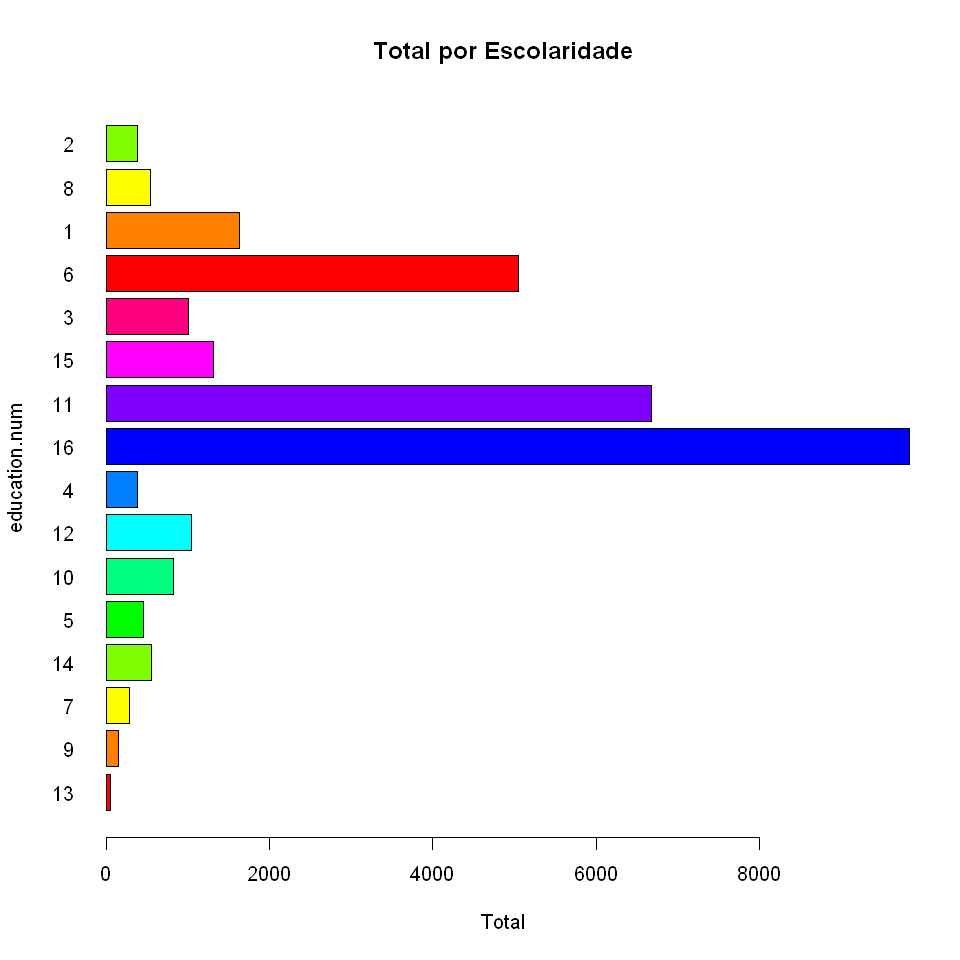

In [16]:
agg <- aggregate( . ~ census$education.num, data = census, length)

barplot(
    agg$education.num,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'education.num',
    main = 'Total por Escolaridade',
    names = unique(census$education.num),
    horiz=TRUE
)

### marital.status

- Sem valores inválidos

In [17]:
table(census$marital.status, useNA = 'ifany')


              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4214                     21                  14065 
 Married-spouse-absent          Never-married              Separated 
                   370                   9726                    939 
               Widowed 
                   827 

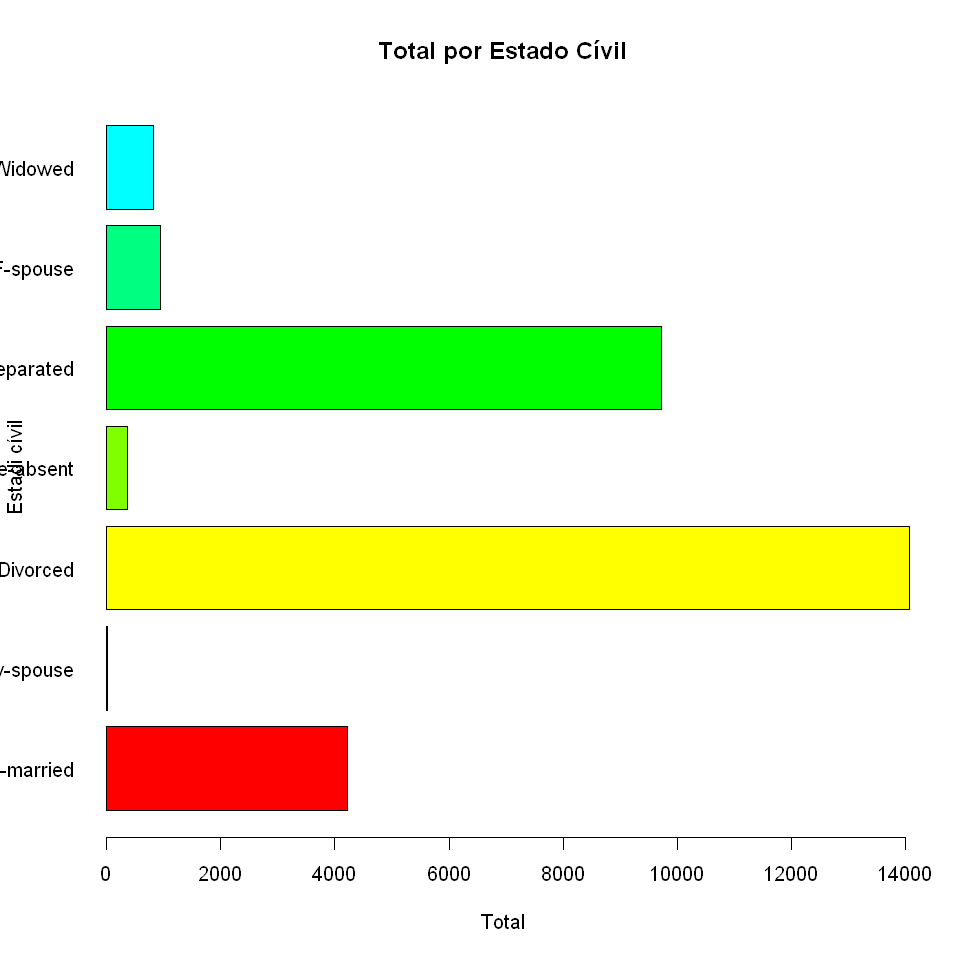

In [18]:
agg <- aggregate( . ~ census$marital.status, data = census, length)

barplot(
    agg$marital.status,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'Estadi cívil',
    main = 'Total por Estado Cívil',
    names = unique(census$marital.status),
    horiz=TRUE
)

### occupation  

- Sem valores inválidos

In [19]:
table(census$occupation, useNA = 'ifany')


      Adm-clerical       Armed-Forces       Craft-repair    Exec-managerial 
              3721                  9               4030               3992 
   Farming-fishing  Handlers-cleaners  Machine-op-inspct      Other-service 
               989               1350               1966               3212 
   Priv-house-serv     Prof-specialty    Protective-serv              Sales 
               143               4038                644               3584 
      Tech-support   Transport-moving 
               912               1572 

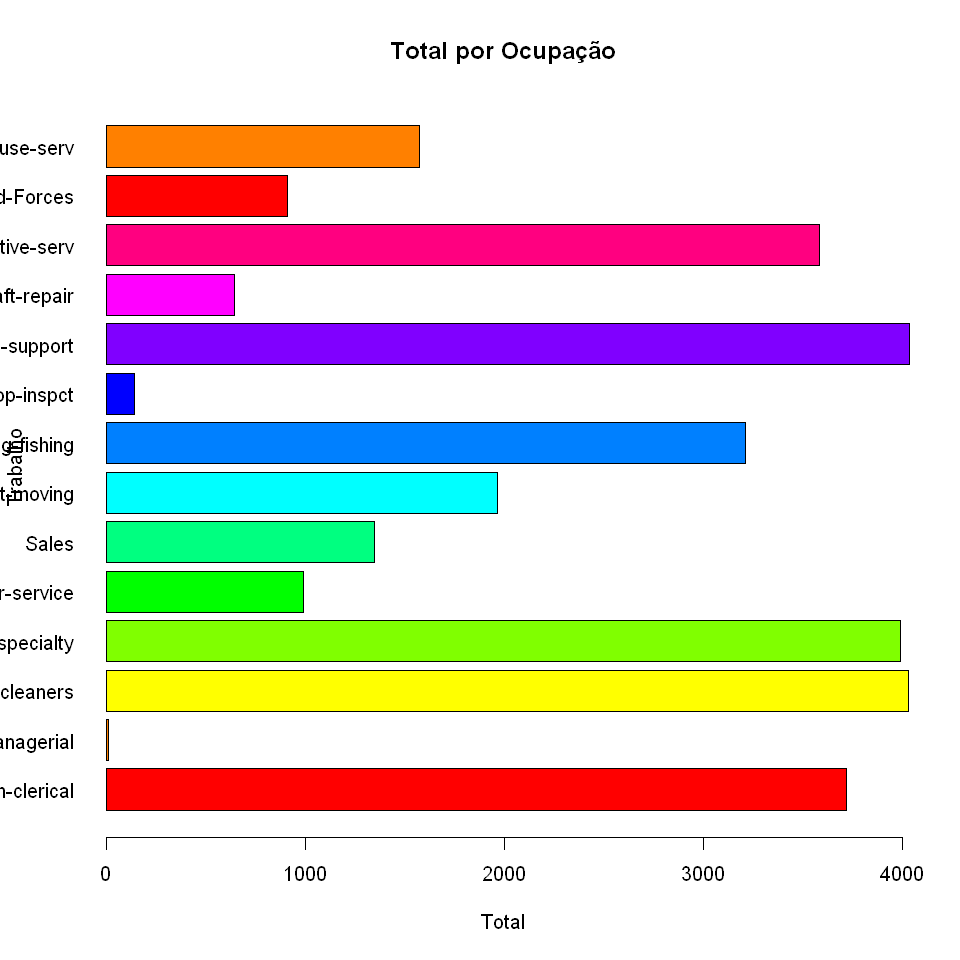

In [20]:
agg <- aggregate( . ~ census$occupation, data = census, length)

barplot(
    agg$occupation,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'Trabalho',
    main = 'Total por Ocupação',
    names = unique(census$occupation),
    horiz=TRUE
)

### relationship 

- Sem valores inválidos

In [21]:
table(census$relationship, useNA = 'ifany')


        Husband   Not-in-family  Other-relative       Own-child       Unmarried 
          12463            7726             889            4466            3212 
           Wife 
           1406 

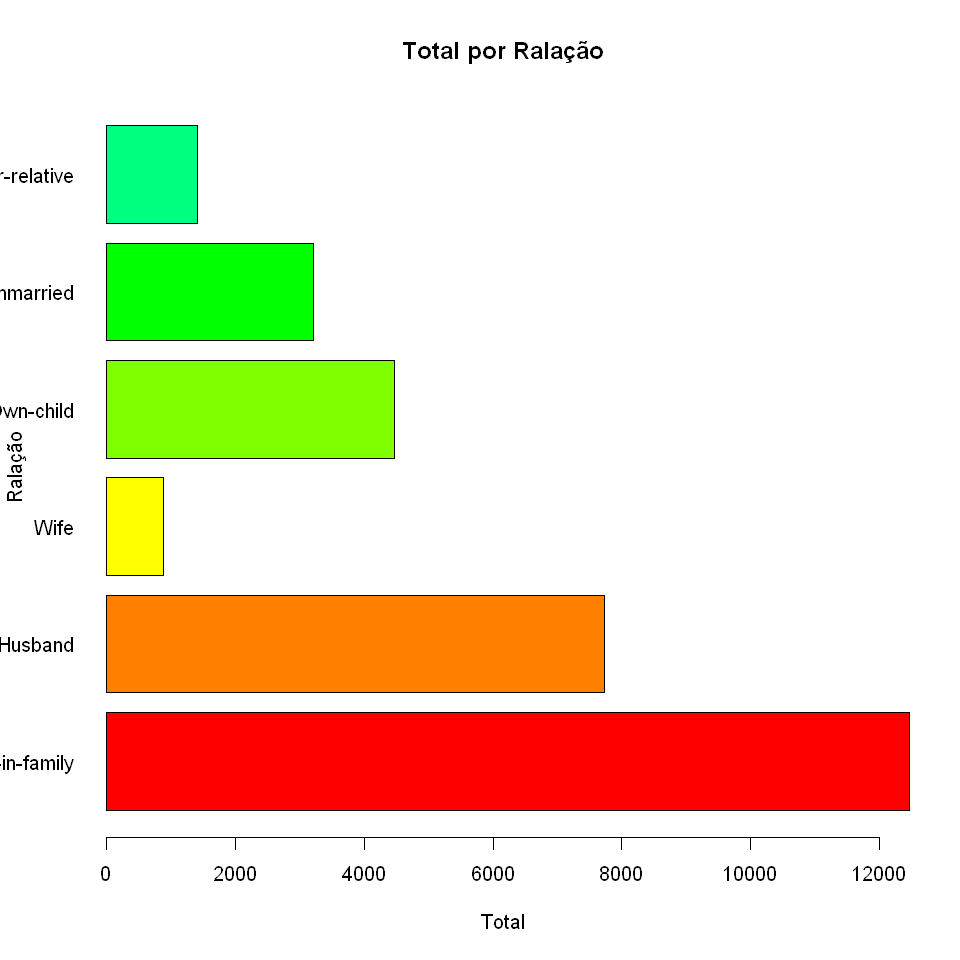

In [22]:
agg <- aggregate( . ~ census$relationship, data = census, length)

barplot(
    agg$relationship,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'Ralação',
    main = 'Total por Ralação',
    names = unique(census$relationship),
    horiz=TRUE
)

### Race

- Sem valores inválidos

In [23]:
table(census$race)


 Amer-Indian-Eskimo  Asian-Pac-Islander               Black               Other 
                286                 895                2817                 231 
              White 
              25933 

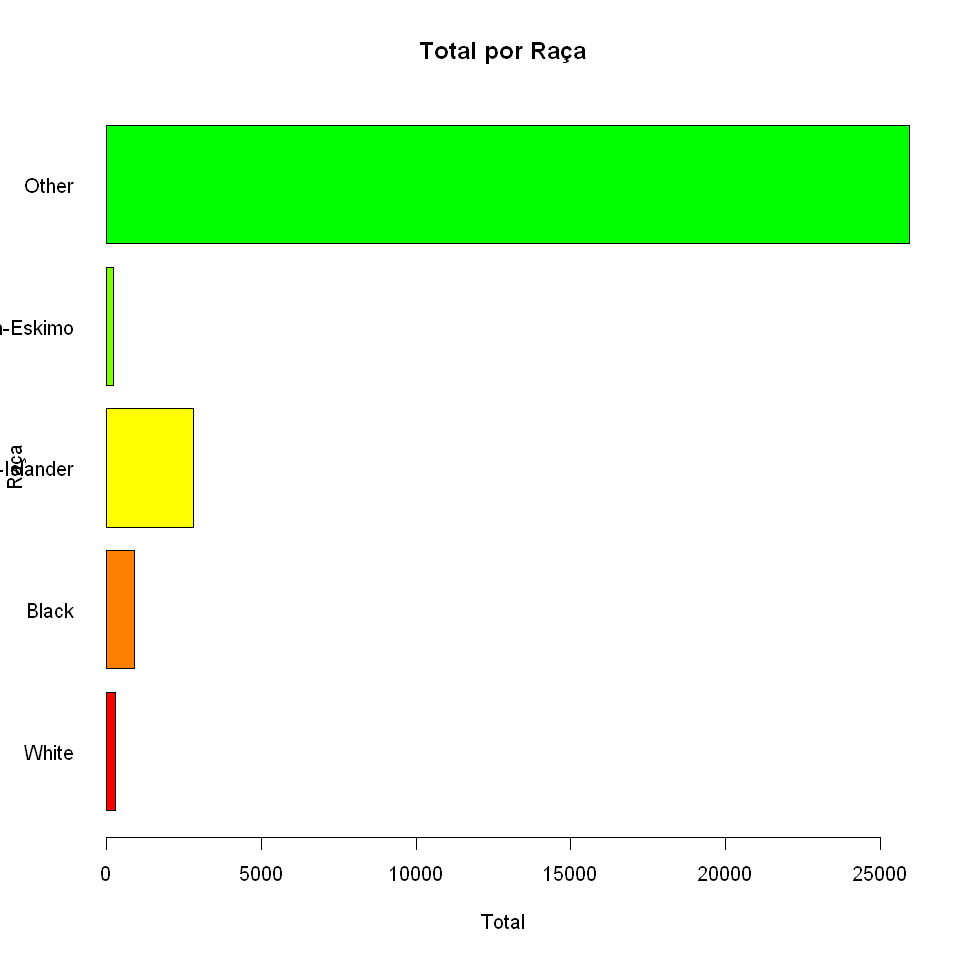

In [24]:
agg <- aggregate( . ~ census$race, data = census, length)

barplot(
    agg$race,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Total',
    ylab = 'Raça',
    main = 'Total por Raça',
    names = unique(census$race),
    horiz=TRUE
)

### sex

- Sem valores inválidos

In [25]:
table(census$sex, useNA = 'ifany')


 Female    Male 
   9782   20380 

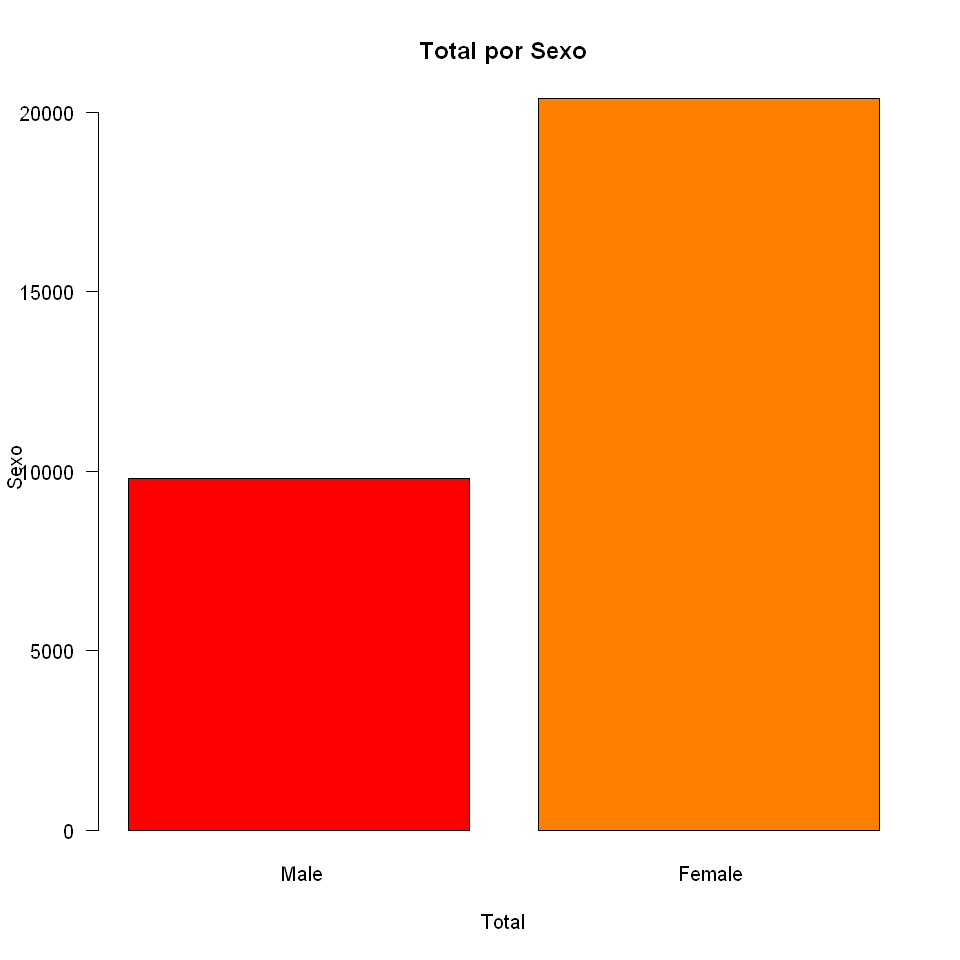

In [26]:
agg <- aggregate( . ~ census$sex, data = census, length)

barplot(
    agg$sex,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Sexo',
    ylab = 'Total',
    main = 'Total por Sexo',
    names = unique(census$sex),
)

### capital.gain

- Sem valores inválidos

In [27]:
sum(is.na(census$capital.gain))
sum(is.null(census$capital.gain))

[1] 0

[1] 0

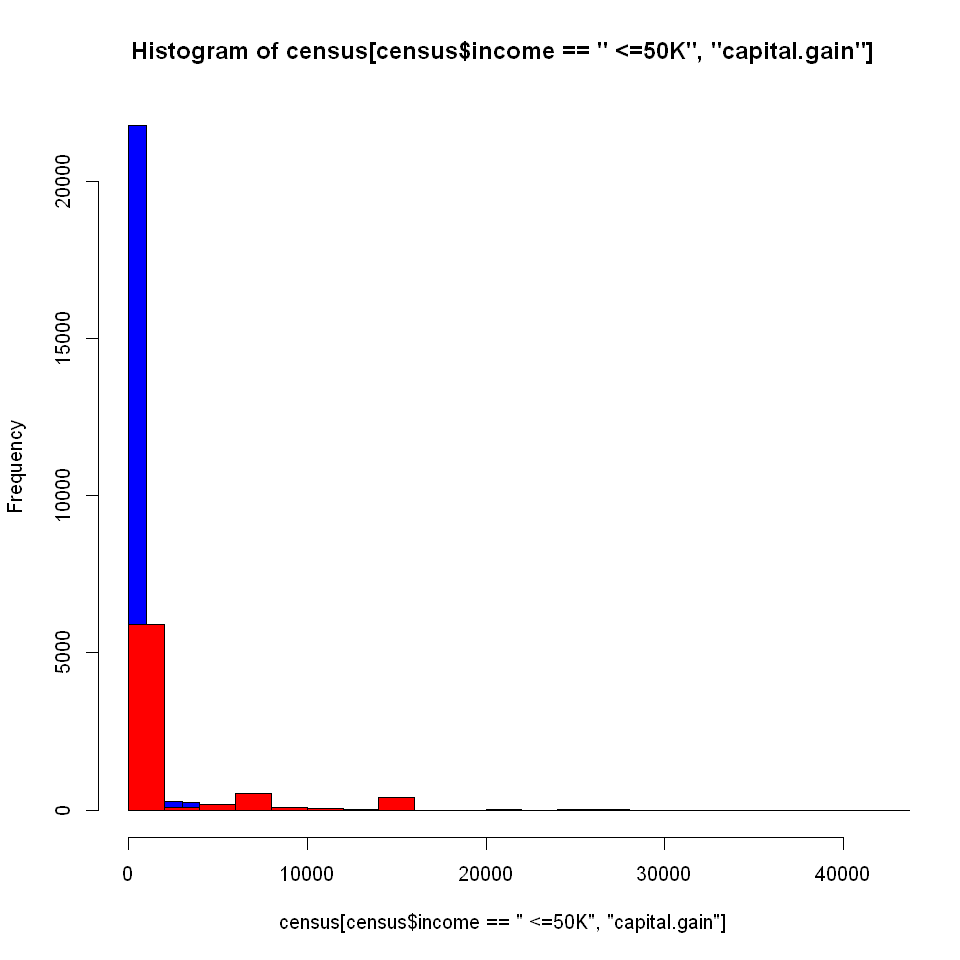

In [28]:
# Idade por cada renda anual
hist(
    census[census$income == ' <=50K', 'capital.gain'],
    col = 'Blue',
    breaks = 50,
)
hist(
    census[census$income != ' <=50K', 'capital.gain'],
    add = T,
    col = 'Red',
    breaks = 50,
)

### capital.loos

- Sem valores inválidos

In [29]:
sum(is.na(census$capital.loos))
sum(is.null(census$capital.loos))

[1] 0

[1] 0

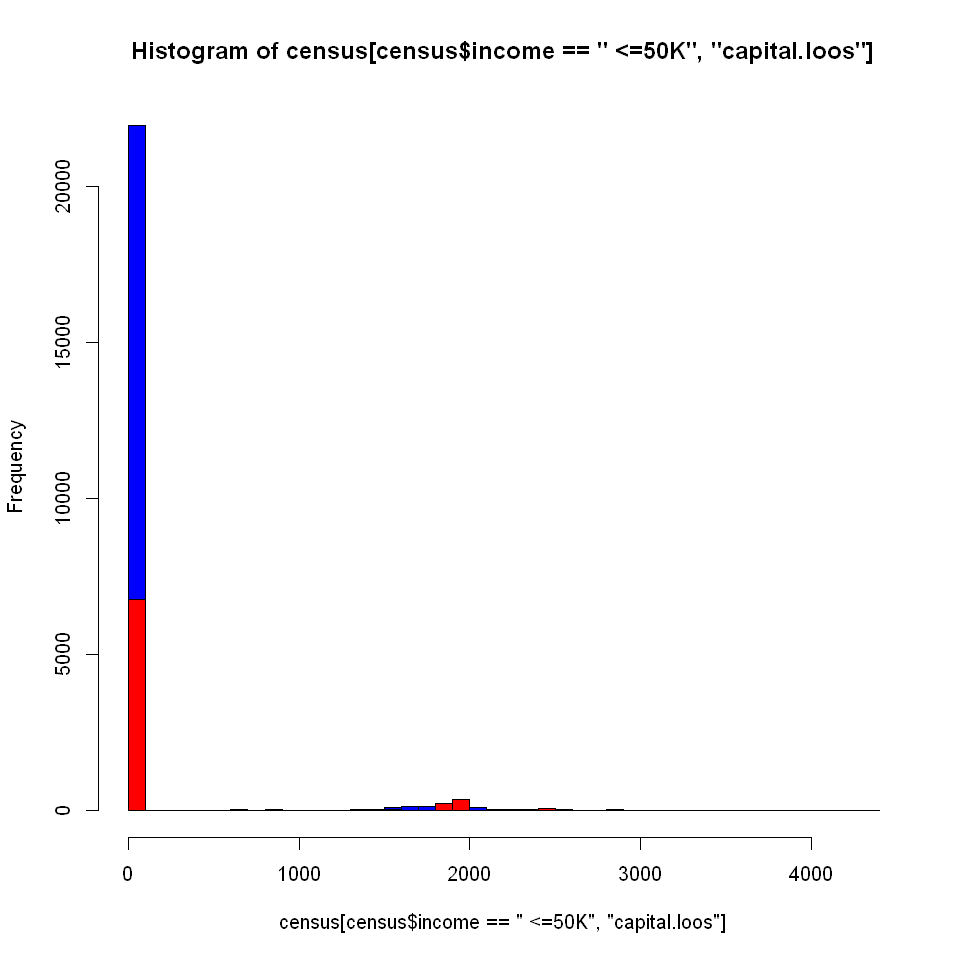

In [30]:
# Idade por cada renda anual
hist(
    census[census$income == ' <=50K', 'capital.loos'],
    col = 'Blue',
    breaks = 50,
)
hist(
    census[census$income != ' <=50K', 'capital.loos'],
    add = T,
    col = 'Red',
    breaks = 50,
)

### hour.per.week

- Sem valores inválidos

In [31]:
sum(is.na(census$hour.per.week))
sum(is.null(census$hour.per.week))

[1] 0

[1] 0

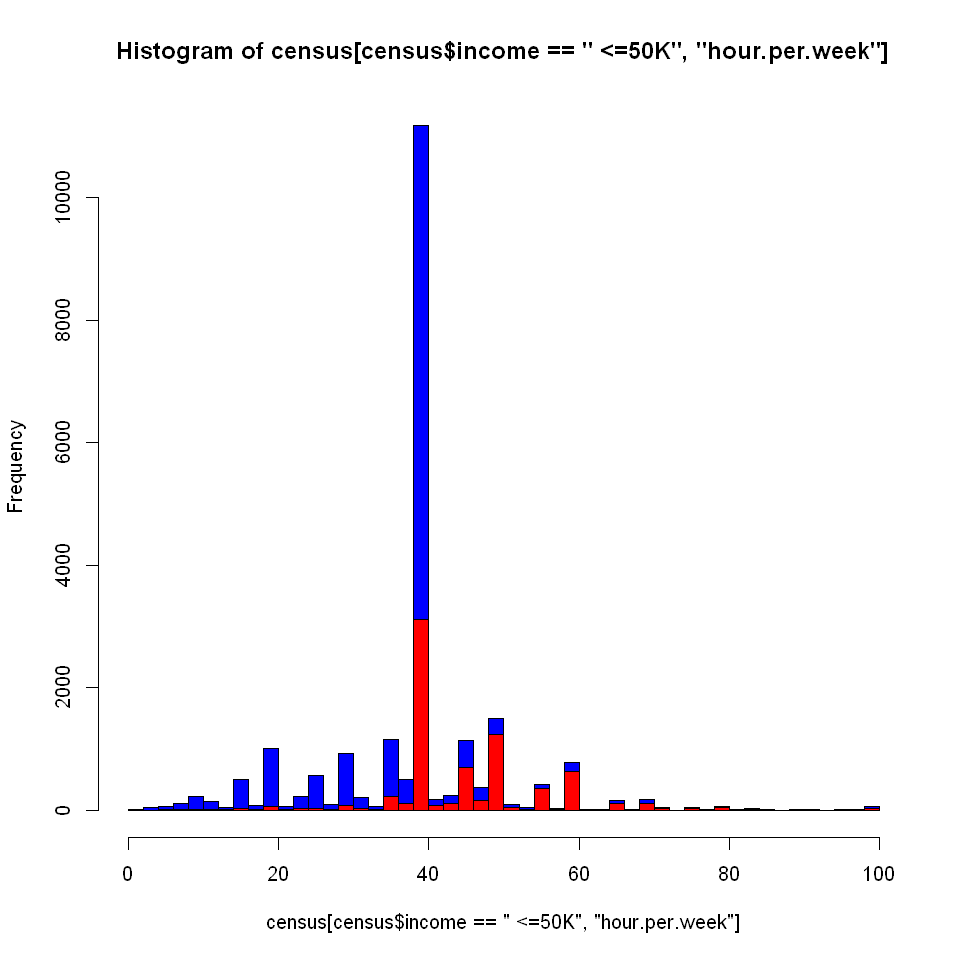

In [32]:
# Idade por cada renda anual
hist(
    census[census$income == ' <=50K', 'hour.per.week'],
    col = 'Blue',
    breaks = 50,
)
hist(
    census[census$income != ' <=50K', 'hour.per.week'],
    add = T,
    col = 'Red',
    breaks = 50,
)

### native.country

- Sem valores inválidos

In [33]:
sum(is.na(census$native.country))
sum(is.null(census$native.country))

[1] 0

[1] 0

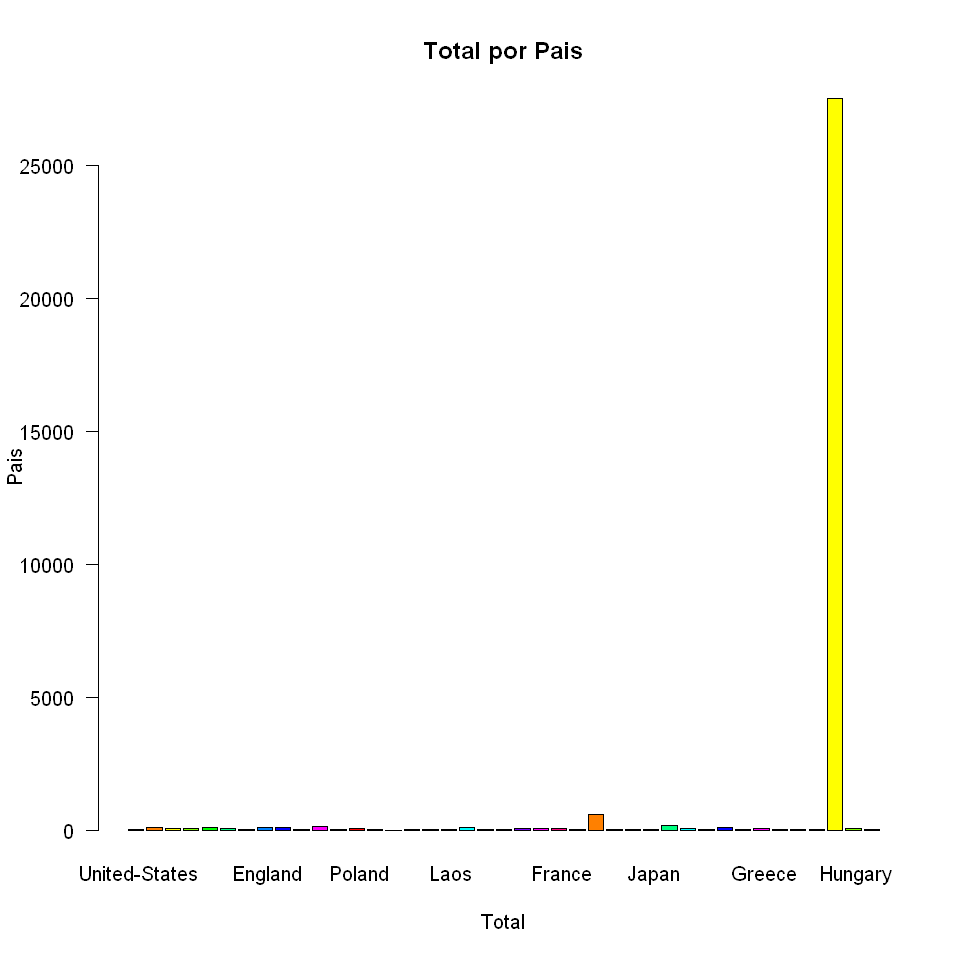

In [64]:
agg <- aggregate( . ~ census$native.country, data = census, length)

barplot(
    agg$native.country,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Pais',
    ylab = 'Total',
    main = 'Total por Pais',
    names = unique(census$native.country),
)

### income 

- Sem valores inválidos

In [35]:
table(census$income, useNA = 'ifany')


 <=50K   >50K 
 22654   7508 

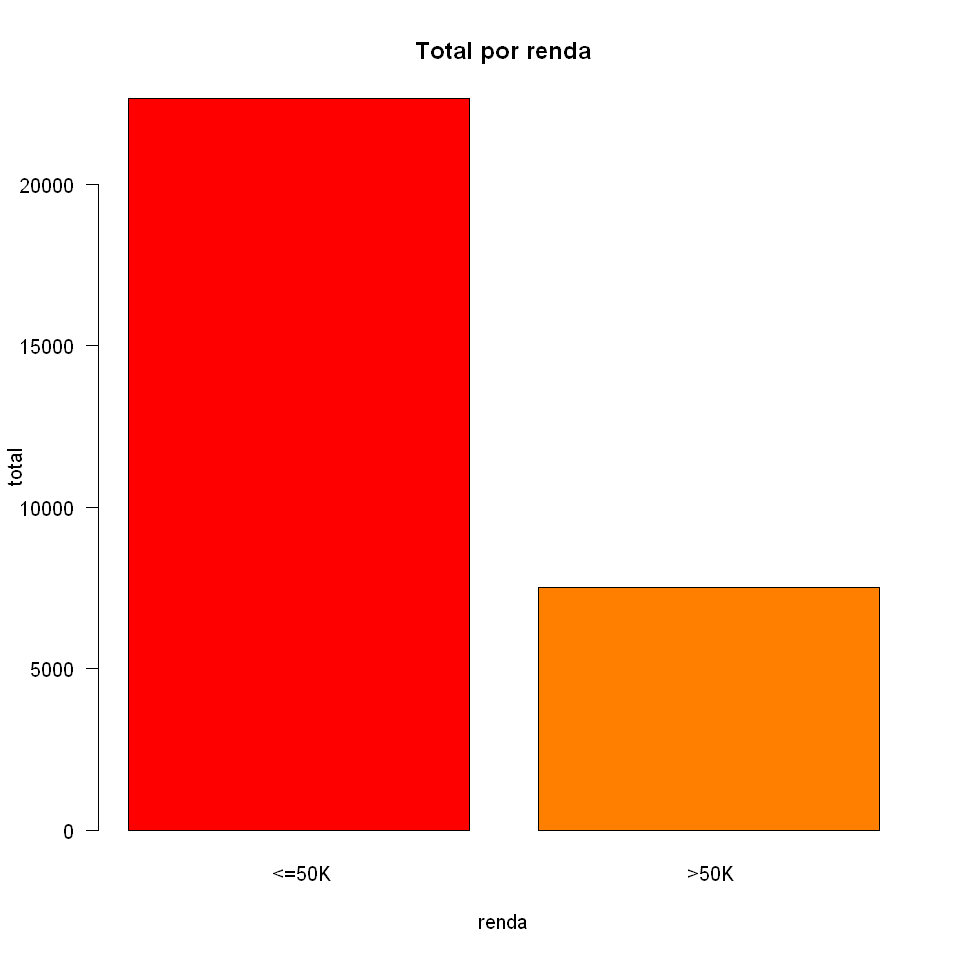

In [36]:
agg <- aggregate( . ~ census$income, data = census, length)

barplot(
    agg$income,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'renda',
    ylab = 'total',
    main = 'Total por renda',
    names = unique(census$income),
)

# Base de Dados de Crédito

In [37]:
credit = read.csv('datasets/credit_data.csv')
head(credit)

clientid,income,age,loan,default
1,66155.93,59.01702,8106.5321,0
2,34415.15,48.11715,6564.7450,0
3,57317.17,63.10805,8020.9533,0
4,42709.53,45.75197,6103.6423,0
5,66952.69,18.58434,8770.0992,1
6,24904.06,57.47161,15.4986,0


## Análise dos Dados

- cliente_id - Nonimal (fica fora da previsão)
- income - Numérica Contínua
- age - Numérica Contínua (neste caso)
- loan (dívida) - Numérica Contínua
- default - 0 (não pagou) 1 (pagou empréstimo) - Numérica Discreta

In [38]:
str(credit)

'data.frame':	2000 obs. of  5 variables:
 $ clientid: int  1 2 3 4 5 6 7 8 9 10 ...
 $ income  : num  66156 34415 57317 42710 66953 ...
 $ age     : num  59 48.1 63.1 45.8 18.6 ...
 $ loan    : num  8107 6565 8021 6104 8770 ...
 $ default : int  0 0 0 0 1 0 0 1 0 0 ...


## Sumário Estatístico

In [39]:
summary(credit)

    clientid          income           age              loan          
 Min.   :   1.0   Min.   :20014   Min.   :-52.42   Min.   :    1.378  
 1st Qu.: 500.8   1st Qu.:32796   1st Qu.: 28.99   1st Qu.: 1939.709  
 Median :1000.5   Median :45789   Median : 41.32   Median : 3974.719  
 Mean   :1000.5   Mean   :45332   Mean   : 40.81   Mean   : 4444.370  
 3rd Qu.:1500.2   3rd Qu.:57791   3rd Qu.: 52.59   3rd Qu.: 6432.411  
 Max.   :2000.0   Max.   :69996   Max.   : 63.97   Max.   :13766.051  
                                  NA's   :3                           
    default      
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.1415  
 3rd Qu.:0.0000  
 Max.   :1.0000  
                 

## Estudo das Variáveis

### income

- Sem valores inválidos

In [40]:
sum(is.na(credit$income))
sum(is.null(credit$income))

[1] 0

[1] 0

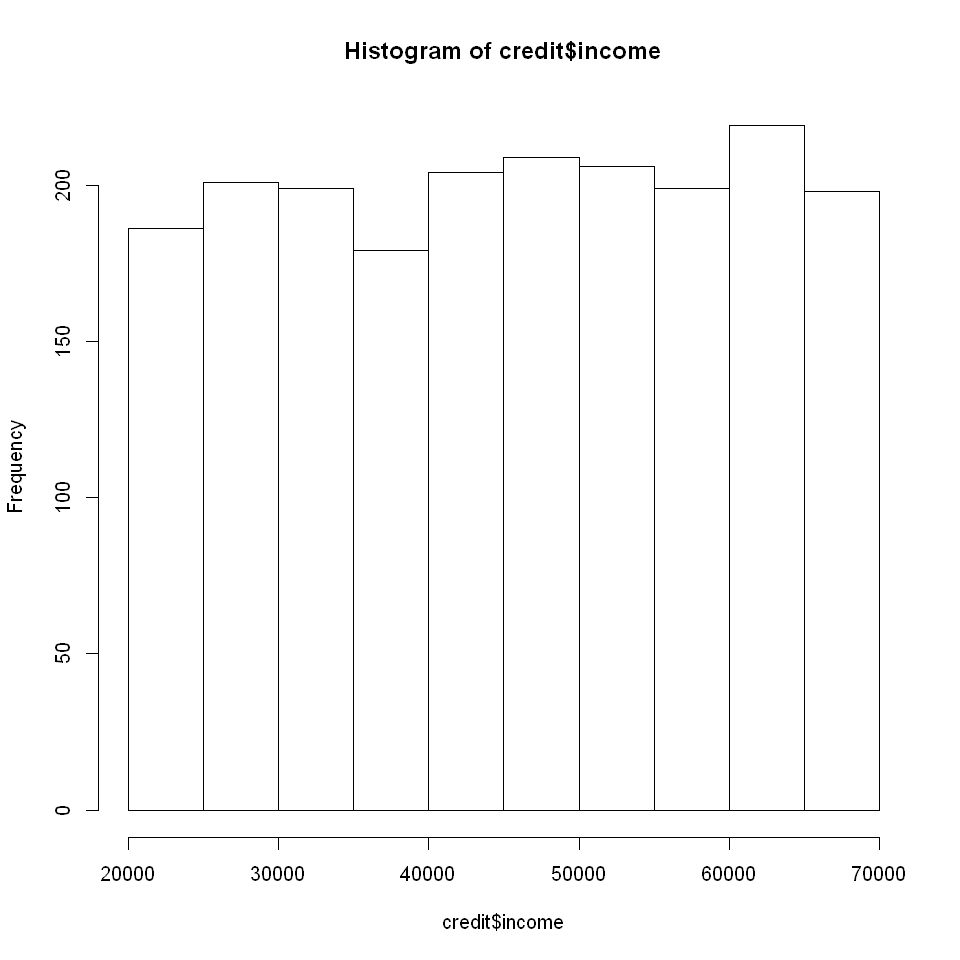

In [41]:
hist(credit$income)

### age

- Valores faltantes
- Valores inválidos 
    - Idade negativa

In [42]:
summary(credit$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -52.42   28.99   41.32   40.81   52.59   63.97       3 

In [43]:
sum(is.na(credit$age))
sum(is.null(credit$age))

[1] 3

[1] 0

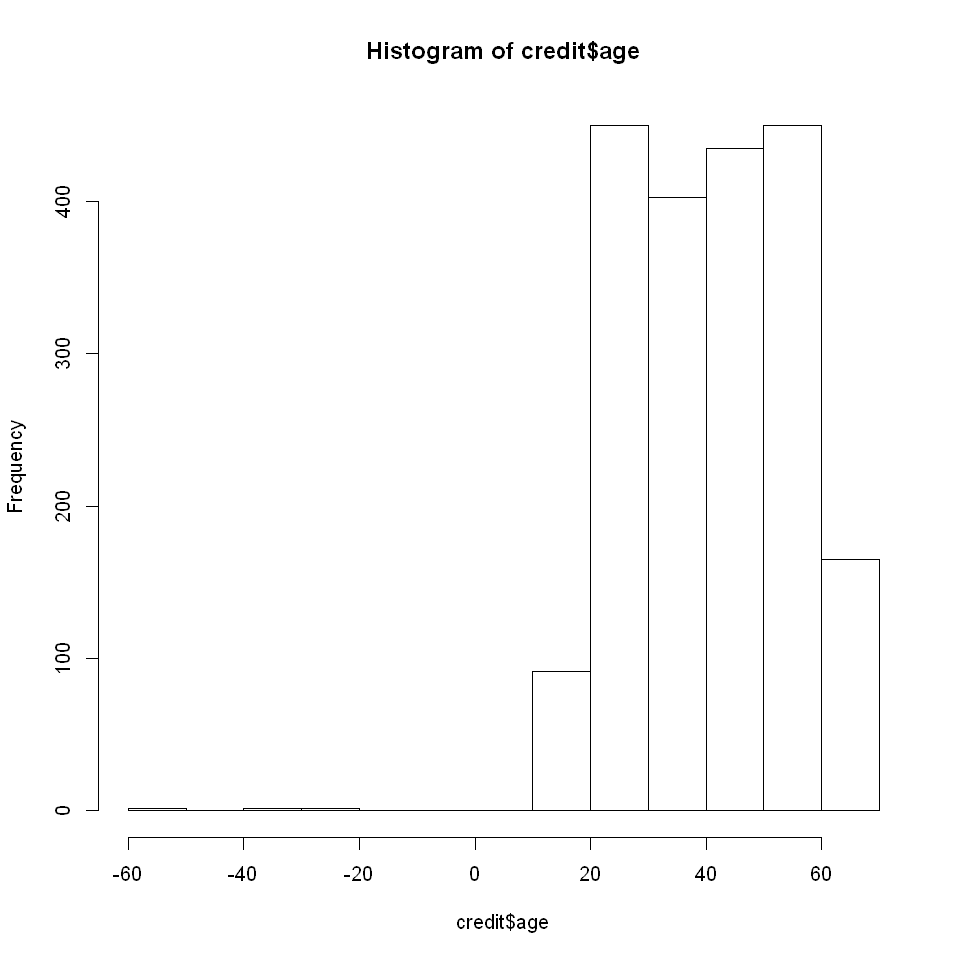

In [44]:
hist(credit$age)

### loan

In [47]:
sum(is.na(credit$loan))
sum(is.null(credit$loan))

[1] 0

[1] 0

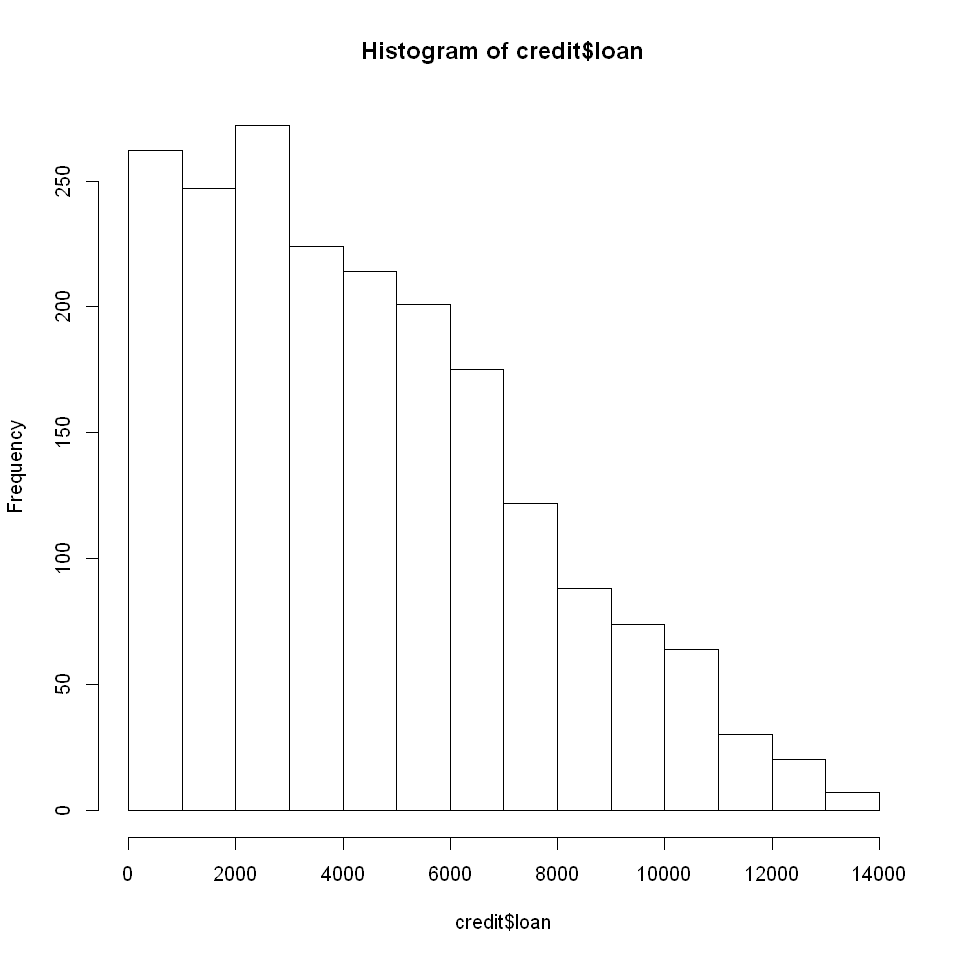

In [48]:
hist(credit$loan)

### default

In [49]:
table(credit$default, useNA = 'ifany')


   0    1 
1717  283 

credit$default,clientid,income,age,loan,default
0,1714,1714,1714,1714,1714
1,283,283,283,283,283


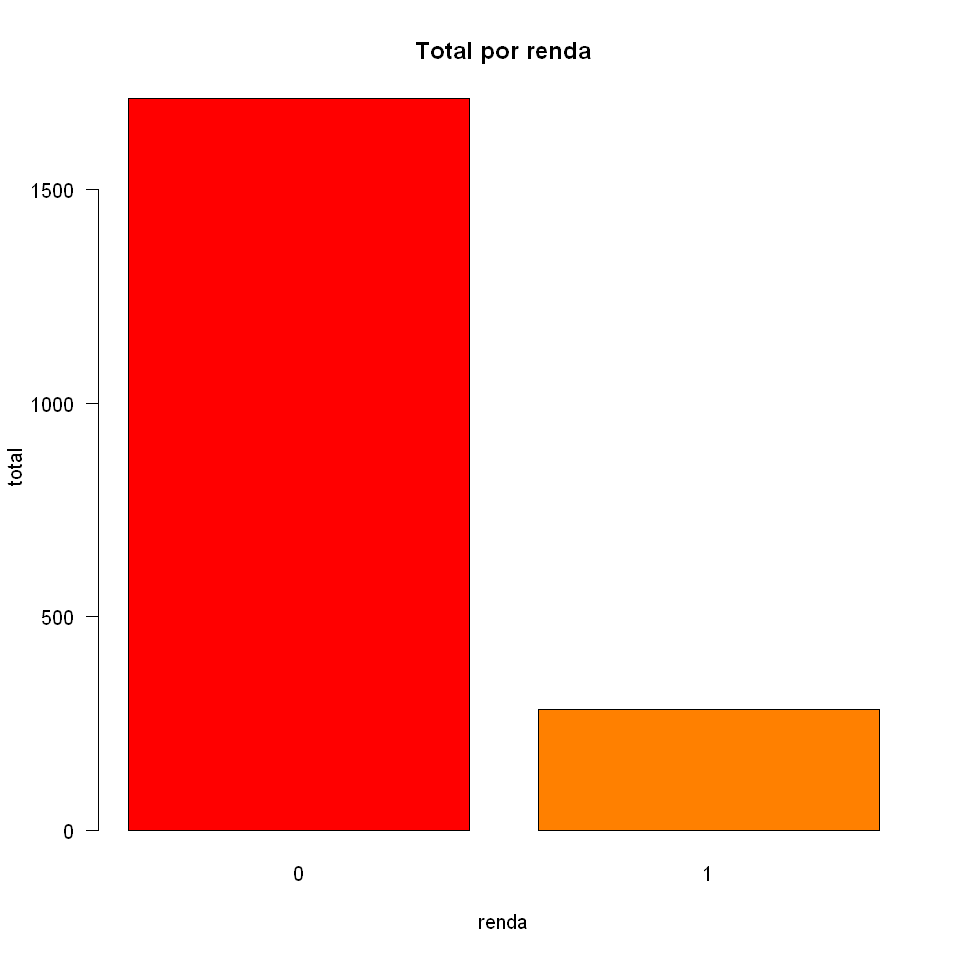

In [62]:
agg <- aggregate( . ~ credit$default, data = credit, length)

agg

barplot(
    agg$default,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'renda',
    ylab = 'total',
    main = 'Total por renda',
    names = unique(credit$default),
)

# Base de Dados de Risco de Crédito

In [51]:
risco = read.csv('datasets/risco_credito.csv')
head(risco)

historia,divida,garantias,renda,risco
ruim,alta,nenhuma,0_15,alto
desconhecida,alta,nenhuma,15_35,alto
desconhecida,baixa,nenhuma,15_35,moderado
desconhecida,baixa,nenhuma,acima_35,alto
desconhecida,baixa,nenhuma,acima_35,baixo
desconhecida,baixa,adequada,acima_35,baixo


## Análise dos Dados

- história - Categórica Nominal
- divida - Categórica Ordinal
- garandias - Categórica Nominal
- renda - Categórica Ordinal
- risco - Categórica Ordinal

In [52]:
str(risco)

'data.frame':	14 obs. of  5 variables:
 $ historia : Factor w/ 3 levels "boa","desconhecida",..: 3 2 2 2 2 2 3 3 1 1 ...
 $ divida   : Factor w/ 2 levels "alta","baixa": 1 1 2 2 2 2 2 2 2 1 ...
 $ garantias: Factor w/ 2 levels "adequada","nenhuma": 2 2 2 2 2 1 2 1 2 1 ...
 $ renda    : Factor w/ 3 levels "0_15","15_35",..: 1 2 2 3 3 3 1 3 3 3 ...
 $ risco    : Factor w/ 3 levels "alto","baixo",..: 1 1 3 1 2 2 1 3 2 2 ...


## Sumário Estatístico

In [53]:
summary(risco)

         historia   divida     garantias       renda        risco  
 boa         :5   alta :7   adequada: 3   0_15    :3   alto    :6  
 desconhecida:5   baixa:7   nenhuma :11   15_35   :4   baixo   :5  
 ruim        :4                           acima_35:7   moderado:3  

## Estudo das Variáveis

### historia

In [76]:
sum(is.na(risco$historia))
sum(is.null(risco$historia))
table(risco$divida, useNA = 'ifany')

[1] 0

[1] 0


 alta baixa 
    7     7 

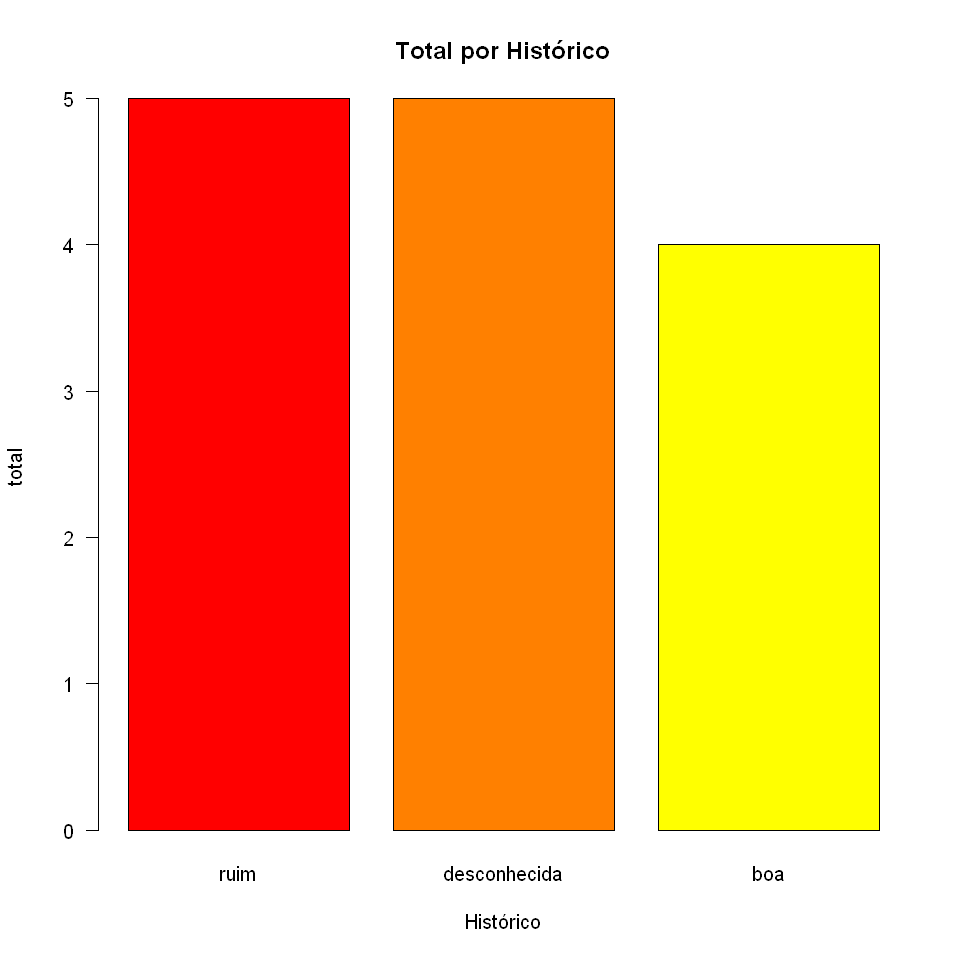

In [78]:
agg <- aggregate( . ~ historia, data = risco, length)

barplot(
    agg$risco,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Histórico',
    ylab = 'total',
    main = 'Total por Histórico',
    names = unique(risco$historia),
)


### divida

In [75]:
sum(is.na(risco$divida))
sum(is.null(risco$divida))
table(risco$divida, useNA = 'ifany')

[1] 0

[1] 0


 alta baixa 
    7     7 

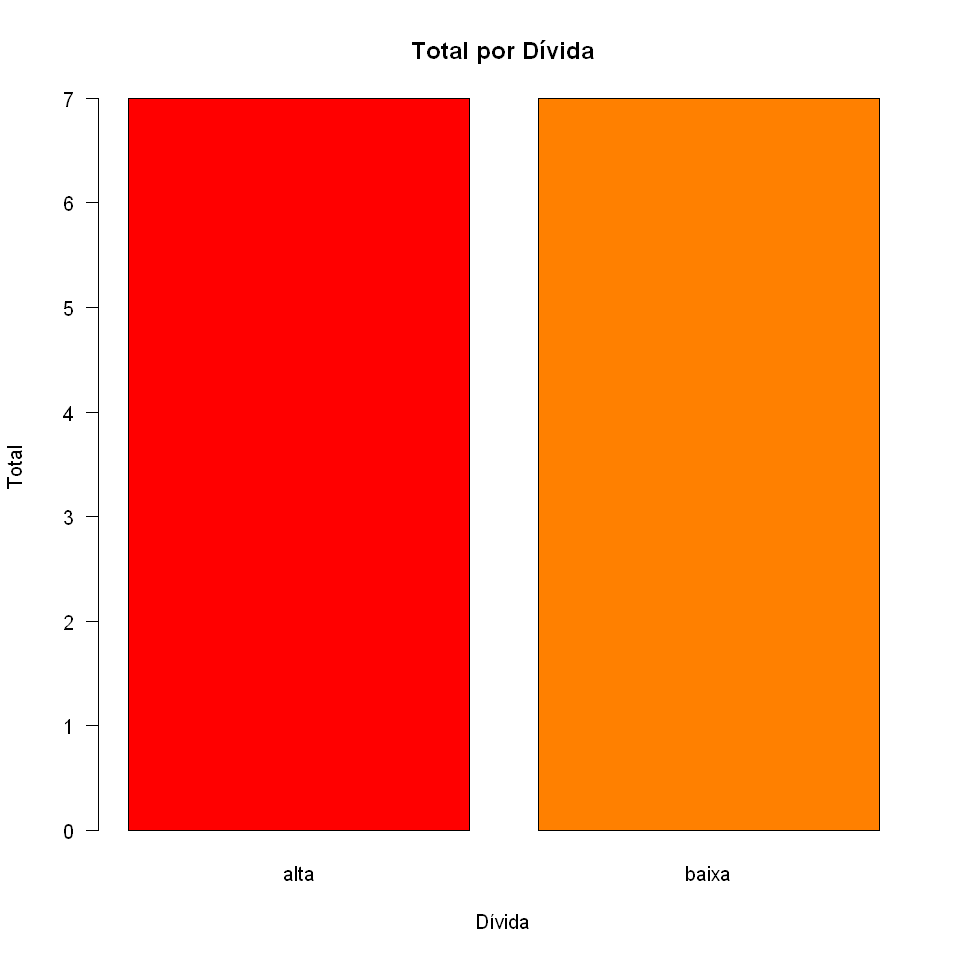

In [77]:
agg <- aggregate( risco ~ divida, data = risco, length)

barplot(
    agg$risco,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Dívida',
    ylab = 'Total',
    main = 'Total por Dívida',
    names = unique(risco$divida),
)


### garantias

In [74]:
sum(is.na(risco$garantias))
sum(is.null(risco$garantias))
table(risco$garantias, useNA = 'ifany')

[1] 0

[1] 0


adequada  nenhuma 
       3       11 

garantias,risco
adequada,3
nenhuma,11


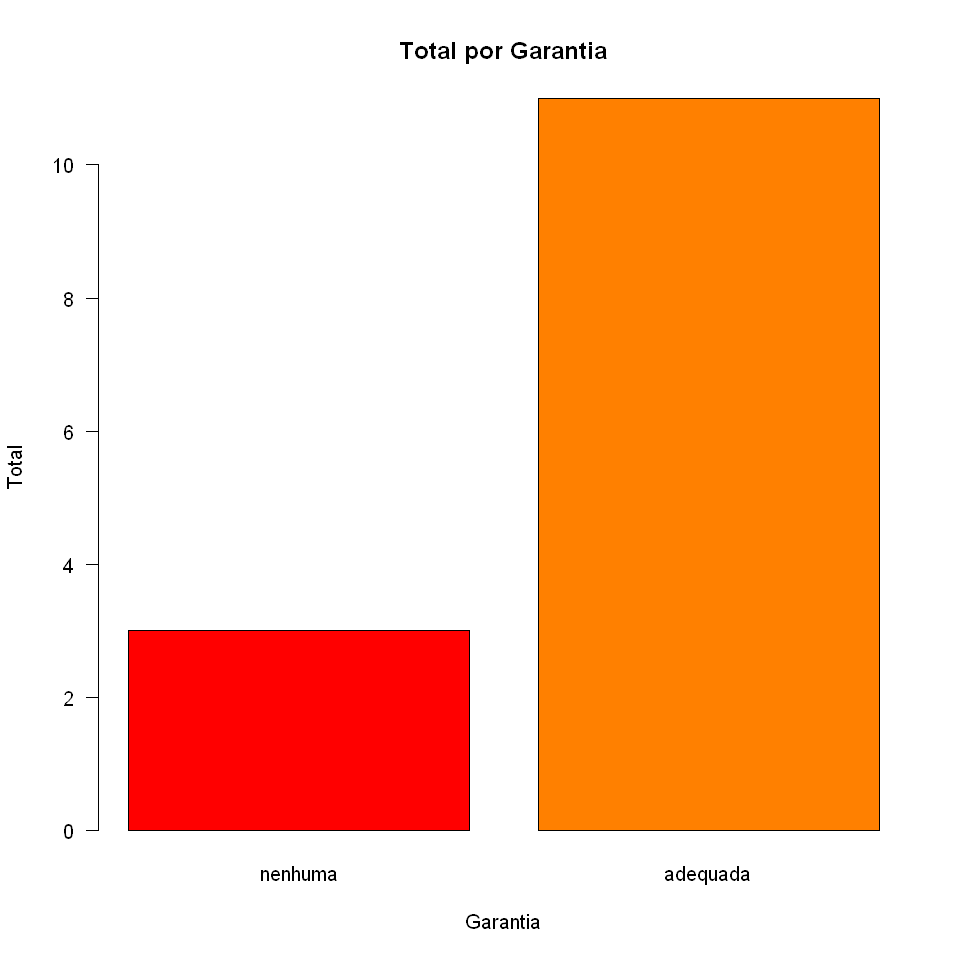

In [82]:
agg <- aggregate( risco ~ garantias, data = risco, length)

agg

barplot(
    agg$risco,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Garantia',
    ylab = 'Total',
    main = 'Total por Garantia',
    names = unique(risco$garantias),
)


### renda

In [83]:
sum(is.na(risco$renda))
sum(is.null(risco$renda))
table(risco$renda, useNA = 'ifany')

[1] 0

[1] 0


    0_15    15_35 acima_35 
       3        4        7 

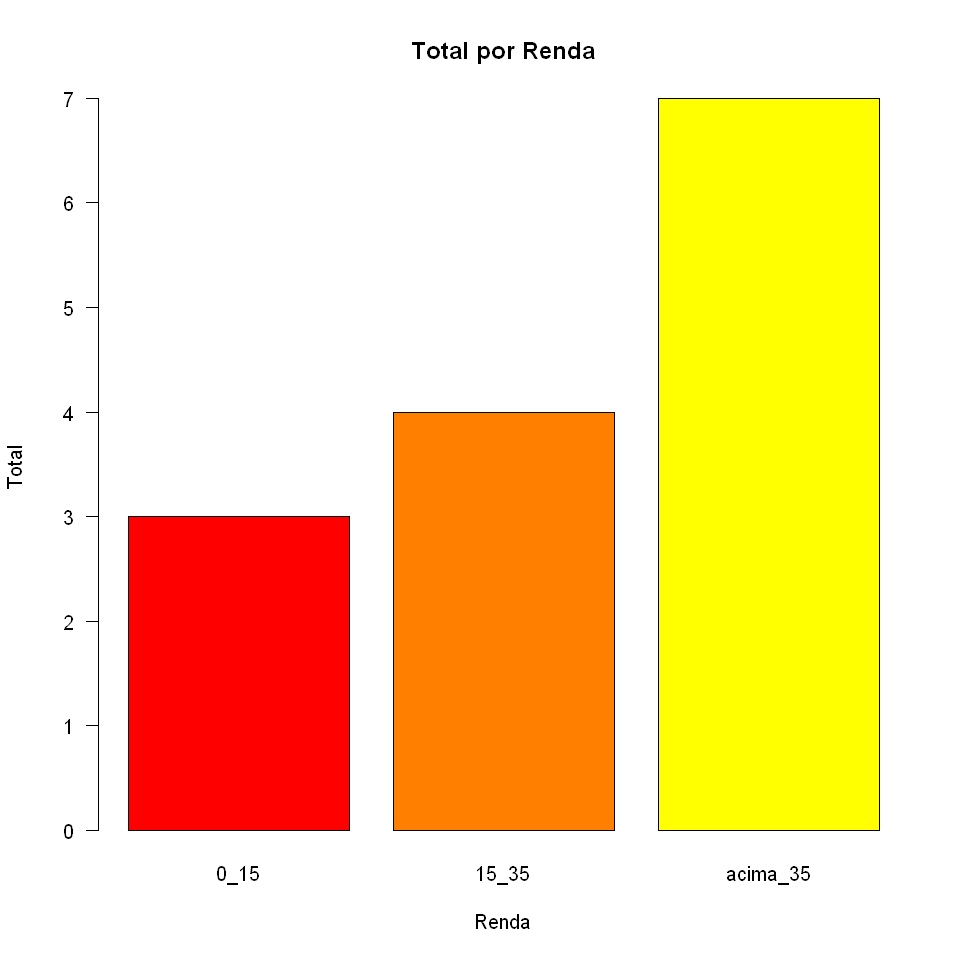

In [85]:
agg <- aggregate( risco ~ renda, data = risco, length)

barplot(
    agg$risco,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Renda',
    ylab = 'Total',
    main = 'Total por Renda',
    names = unique(risco$renda),
)


### risco

In [89]:
sum(is.na(risco$renda))
sum(is.null(risco$renda))
table(risco$renda, useNA = 'ifany')

[1] 0

[1] 0


    0_15    15_35 acima_35 
       3        4        7 

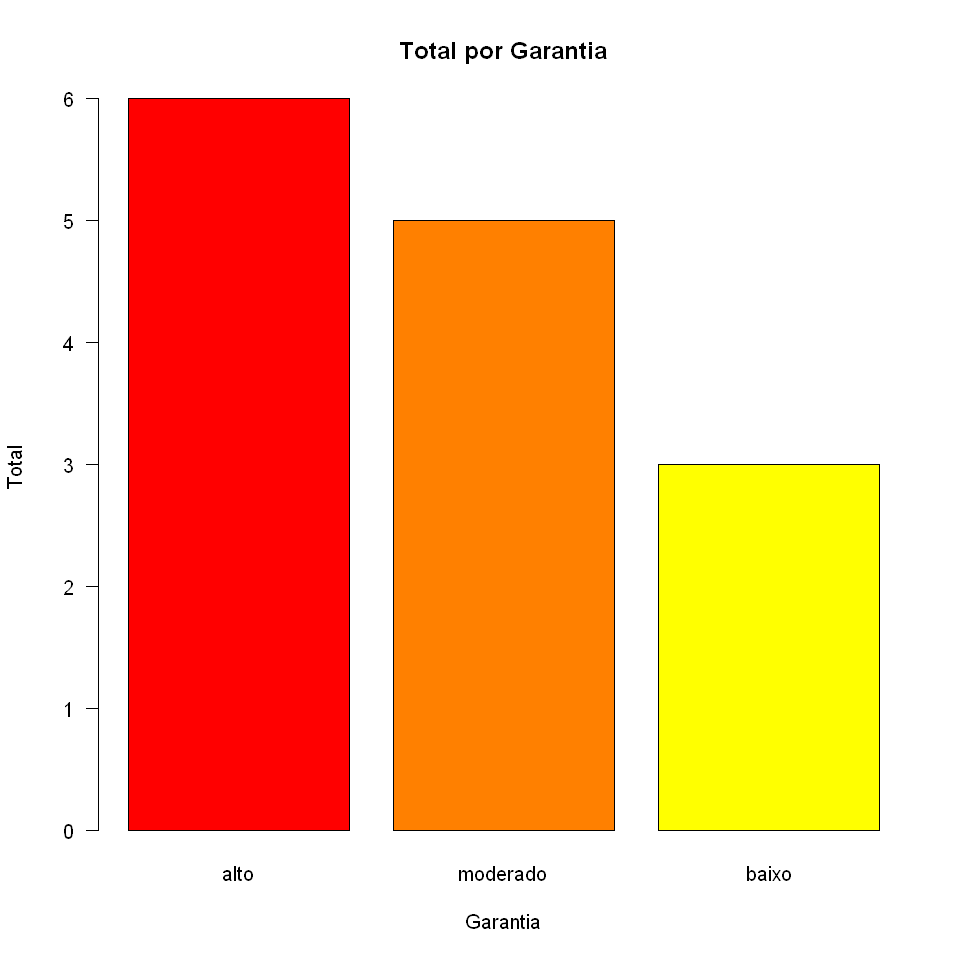

In [88]:
agg <- aggregate( . ~ risco, data = risco, length)

barplot(
    agg$renda,
    las = 1,
    col = rainbow(12),
    beside = TRUE,
    xlab = 'Risco',
    ylab = 'Total',
    main = 'Total por Risco',
    names = unique(risco$risco),
)
